In [21]:
from IPython.display import display, Markdown


# Série 2 - Résolution d'équation non linéaire

Il est fréquent d'avoir besoin d'obtenir une solution numérique approchée à une équation non linéaire qui ne dispose de solution analytique simple. Dans ce cas, plusieurs techniques existent comme vu en cours.

Le but de cette série d'exercice est de vous entraîner à l'utilisation de ces méthodes et de mieux comprendre leur forces et limitations.

**Exercice 1 - Préliminaire**

Soit l'équation d'état du $CO_2$

$$\left[ p + a \left( \frac{N}{V} \right)^2 \right] 
  \left( V - Nb \right) = k N T $$
  
avec :
- $k = 1.3806503 \cdot 10^{-23}$  la Constante de Boltzmann en Joule/Kelvin
- $a = 0.401$ Pascal m$^6$
- $b = 4.27\cdot 10^{-5}$  m$^3$

Le but est d'estimer le volume de $CO_2$ gazeux correspondant aux conditions suivantes :
- $N = 1000$ molécules
- $T = 300$  Kelvins
- $p = 3.5\cdot 10^{7}$  Pascals

Pour cela vous devez :
1. Ecrire une fonction en python qui prend en entrée le volume $V$ et renvoit  en sortie : 
$$
\left[ p + a \left( \frac{N}{V} \right)^2 \right] 
  \left( V - Nb \right) - k N T
$$
Cette fonction sera égale à zéro quand on lui donne le volume recherché en entrée.
2. Faire un graphe de cette fonction pour une gamme de valeur de $V$ allant de 0.03 à 0.1 m$^3$.
3. Vérifier que la fonction passe bien par zéro dans l'intervalle 0.03 à 0.1

On constate bien que la fonction passe de -6 à +4, il y a donc un zéro dans l'intervalle [0.03, 0.1]. Graphiquement, on observe qu'elle vaut zéro pour un volume de l'ordre de 0.043.

**Exercice 2 - Utilisation de fsolve**

Pour commencer, et comme c'est la solution que l'on utilisera le plus souvent en pratique, employez la fonction `fsolve` du module `scipy.optimize` pour calculer le volume de gaz. Combien trouvez-vous ?

Utilisez la cellule ci-dessous pour écrire les 2 lignes de codes nécessaires et imprimez le résultat.

Le volume de CO$_2$ recherché est de   0.04 m$^3$

**Exercice 3 - Bisection**

Ecrire un code python pour implémenter la méthode de bisection pour trouver la valeur de $V$. Afin de pouvoir l'appliquer ensuite pour différents cas, écrivez l'algorithme dans une fonction. La cellule ci-dessous donne les spécifications (input, output) de cette fonction. 

Appliquer la fonction ainsi définie au problème de calcul du volume de CO2. Est-ce que le résultat est en accord avec celui que vous avez déja obtenu ?

Faites quelques essais pour voir comment la solution (volume V et nombre d'itération) dépend de l'erreur choisie. 
Combien d'itérations faut-il pour obtenir un résultat avec une tolérance de 1e-20 ?


On constate qu'il faut une tolérance inférieure à 1e-4 pour retrouver la valeur donnée par `fsolve`. Le calcul est rapide même avec une tolérance très faible, par ex 1e-20, les 1000 itérations nécessaires sont calculés en quelques fractions de secondes.

**Exercice 4 - Méthode de Newton**

Comme ci-dessus, on vous demande une fonction pour trouver le zéro de la fonction d'état du CO2 mais cette fois-ci avec la méthode de newton.

Une petite difficulté dans la méthode de Newton est qu'il vous faut la dérivée en chaque point. Pour la calculer, la fonction `derive()` vous est donné ci-dessous.

En combien d'itération obtenez-vous un résultat avec une tolérance de 1e-20 ?

In [56]:
def derive(f,x,dx=1e-5):
    """Calcule la dérivée f'(x) centrée au point x par la méthode des incréments."""
    return ( f( x + dx ) - f( x - dx ) ) / ( 2 * dx )



La méthode de Newton renvoie une valeur de 0.043 en 7 itérations.

**Exercice 5 - Comparaison des méthodes**

Nous cherchons maintenant le zéro de la fonction :

$$f(x) = \sin(2x)-1+x$$

Le bloc ci-dessous vous donne la définition de la fonction et le graphe dans l'intervalle $[-3,3]$.



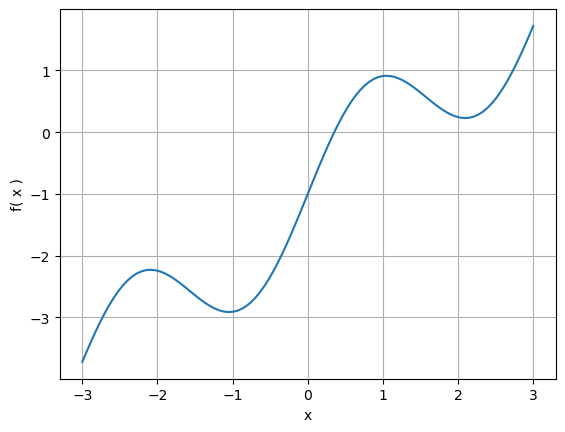

In [59]:
def f(x):
    return  np.sin(2*x) - 1 + x

K = np.linspace(-3,3,100)
plt.plot(K,f(K))
plt.grid('on')
plt.xlabel('x')
plt.ylabel('f( x )')
plt.show()

On vous demande de comparer les résultats obtenus par :
- votre fonction de bisection en partant de l'intervale [-3,3] avec une erreur de 1e-10
- votre fonction basée sur la méthode de Newton en partant de $x=2.0$ avec une erreur de 1e-10
- la fonction `fsolve` en partant aussi de $x=2.0$

Qu'observez-vous ?

Essayez la même chose en prenant un point de départ plus proche de la solution.